# Logistic Regression

Logistic regression is a supervised learning algorithm that classify an object into one of two classes. That type of classifier is called a binary classifier.

Good introducion reading at [deeplearning.stanford.edu](http://deeplearning.stanford.edu/tutorial/supervised/LogisticRegression/)

### Predicting cancer type using [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

#### Load and analyze data

In [1]:
import numpy as np
from sklearn import datasets
patients = datasets.load_breast_cancer()

In [2]:
#print(patients.DESCR)

In [3]:
print(patients.data.shape)
print(patients.target.shape)

(569, 30)
(569,)


In [4]:
print("First patient in database")
print(patients['data'][0,:])

First patient in database
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [6]:
print(patients.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

#### Split data in train and test batches

In [7]:
from sklearn.model_selection import train_test_split

patients_train_data, patients_test_data, \
patients_train_target, patients_test_target = \
train_test_split(patients.data,patients.target, test_size=0.1, random_state=101)

In [8]:
print("Training dataset:")
print("patients_train_data:", patients_train_data.shape)
print("patients_train_target:", patients_train_target.shape)

Training dataset:
patients_train_data: (512, 30)
patients_train_target: (512,)


In [9]:
print("Testing dataset:")
print("patients_test_data:", patients_test_data.shape)
print("patients_test_target:", patients_test_target.shape)

Testing dataset:
patients_test_data: (57, 30)
patients_test_target: (57,)


#### Initiate and train model on training data

[1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0
 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0]


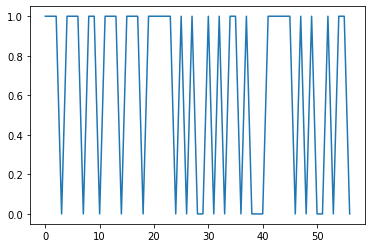

In [25]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logistic_regression = LogisticRegression(solver='newton-cg') #zwraca 0 lub 1
logistic_regression.fit(patients_train_data, patients_train_target)
lr=logistic_regression.predict(patients_test_data)

plt.plot(lr)
print(lr)

#### Using classifier

In [27]:
id=6
prediction = logistic_regression.predict(patients_test_data[id,:].reshape(1,-1))
print("Model predicted for patient {0} value {1}".format(id, prediction))

print("Real value for patient \"{0}\" is {1}".format(id, patients_test_target[id]))

Model predicted for patient 6 value [1]
Real value for patient "6" is 1


In [35]:
prediction_probability = logistic_regression.predict_proba(patients_test_data)
print(prediction_probability)

[[3.27827354e-03 9.96721726e-01]
 [2.72972107e-02 9.72702789e-01]
 [1.35063323e-03 9.98649367e-01]
 [9.99925404e-01 7.45962182e-05]
 [8.74217583e-05 9.99912578e-01]
 [3.84732494e-04 9.99615268e-01]
 [2.39460494e-05 9.99976054e-01]
 [9.99999713e-01 2.86953071e-07]
 [2.57243799e-03 9.97427562e-01]
 [1.98949731e-04 9.99801050e-01]
 [9.89980200e-01 1.00197997e-02]
 [1.36238337e-03 9.98637617e-01]
 [2.26620100e-02 9.77337990e-01]
 [2.72359973e-03 9.97276400e-01]
 [9.99978056e-01 2.19435102e-05]
 [8.90130580e-04 9.99109869e-01]
 [1.89331434e-03 9.98106686e-01]
 [9.41419740e-04 9.99058580e-01]
 [1.00000000e+00 3.50068610e-16]
 [2.07693532e-01 7.92306468e-01]
 [1.57317226e-02 9.84268277e-01]
 [7.19554578e-04 9.99280445e-01]
 [6.06508302e-03 9.93934917e-01]
 [4.03693206e-04 9.99596307e-01]
 [9.98331330e-01 1.66866962e-03]
 [7.56515794e-02 9.24348421e-01]
 [9.99568074e-01 4.31926187e-04]
 [3.54877735e-06 9.99996451e-01]
 [9.99997271e-01 2.72945104e-06]
 [6.17167911e-01 3.82832089e-01]
 [8.154405

### Evaluate a classifier using the test data

In [36]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(patients_test_target, logistic_regression.predict(patients_test_data))
print("Model accuracy is {0:0.2f}".format(acc))

Model accuracy is 0.95


#### Evaluating classifier using [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix)

In [28]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(patients_test_target, logistic_regression.predict(patients_test_data))
print(conf_matrix)

[[19  3]
 [ 1 34]]


### [Multiclass classification](https://scikit-learn.org/stable/modules/multiclass.html) using [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)

In [42]:
from sklearn.multiclass import OneVsRestClassifier

In [43]:
#New in version 0.18
multiple_classes_data = datasets.load_wine()

In [44]:
print(multiple_classes_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [45]:
print("Classes in data:", np.unique(multiple_classes_data.target))

Classes in data: [0 1 2]


In [46]:
wine_train_data, wine_test_data, \
wine_train_target, wine_test_target = \
train_test_split(multiple_classes_data.data, multiple_classes_data.target, test_size=0.1)

In [49]:
#initiate classifier
multiclass_classifier = OneVsRestClassifier(LogisticRegression(solver = 'newton-cg'))

#fit classifier
multiclass_classifier.fit(wine_train_data, wine_train_target);

In [52]:
# check classifier for some object
id=17
prediction = multiclass_classifier.predict(wine_test_data[id,:].reshape(1,-1))
print("Multiclass model predicted for wine {0} class {1}".format(id, prediction))

print("Real class for wine \"{0}\" is {1}".format(id, wine_test_target[id]))

Multiclass model predicted for wine 17 class [0]
Real class for wine "17" is 0


In [54]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(wine_test_target, multiclass_classifier.predict(wine_test_data))
print(conf_matrix)

[[5 0 0]
 [0 9 1]
 [0 0 3]]


# Student task 

Using data in a file `credit_clients.xls` train the logistic regression model to predict whether a client will be given a credit. Evaluate model with accuracy score and confusion matrix.

More info about data can be found [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients).

Hint: Consider standardisation the data!

In [58]:
import pandas as pd
import numpy as np

from pandas import ExcelWriter
from pandas import ExcelFile
 
df = pd.read_excel('credit_clients.xls')

In [59]:
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [60]:
data = df.iloc[1:,1:-1]
target = df.iloc[1:,-1]

In [64]:
data.head()
#target.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [68]:
data_ = np.array(data, dtype=np.int16)
target_ = np.array(target, dtype=np.int16)

print(type(data_))
print(type(target_))

print(data_.shape)
print(target_.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(30000, 23)
(30000,)


In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
data_ = scaler.fit_transform(data_)

credit_train_data, credit_test_data, \
credit_train_target, credit_test_target = \
train_test_split(data_,target_, test_size=0.1, random_state=101)

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logistic_regression = LogisticRegression(solver = 'liblinear') #zwraca 0 lub 1
logistic_regression.fit(credit_train_data, credit_train_target)
lr=logistic_regression.predict(credit_test_data)

print(lr)


from sklearn.metrics import accuracy_score
acc = accuracy_score(credit_test_target, logistic_regression.predict(credit_test_data))
print("Model accuracy is {0:0.2f}".format(acc))

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(credit_test_target, logistic_regression.predict(credit_test_data))
print(conf_matrix)

[0 0 0 ... 0 0 0]
Model accuracy is 0.82
[[2312   45]
 [ 501  142]]
